# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Import Data

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Analysing Data

In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.drop(['Date'], axis = 1, inplace = True)

In [7]:
df['RainTomorrow'].isnull().sum()


3267

In [8]:
# Droping the missing values
df = df.dropna(subset = ['RainTomorrow'])

In [9]:
df.shape

(142193, 22)

In [10]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

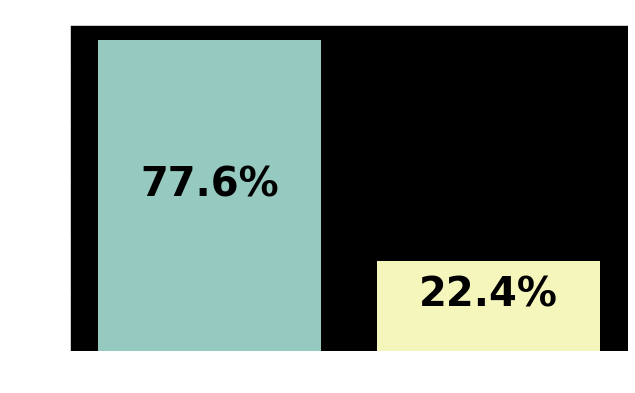

In [11]:
# Checking for the class imbalance
fig = plt.figure(figsize = (10, 6))
axis = sns.countplot(x = 'RainTomorrow', data = df);
axis.set_title('Class Distribution for the target feature', size = 16);

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(df)*100, 1)}%", 
            ha = 'center', size = 40, rotation = 0, weight = 'bold' ,color = 'black')
    
axis.set_xlabel('Rain Tomorrow', size = 14)
axis.set_ylabel('Count', size = 14);

In [12]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
# df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
# df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
# df['RainToday'] = le.fit_transform(df['RainToday'])
# df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [13]:
# x = df.drop(['RainTomorrow'], axis = 1)
# y = df['RainTomorrow']

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

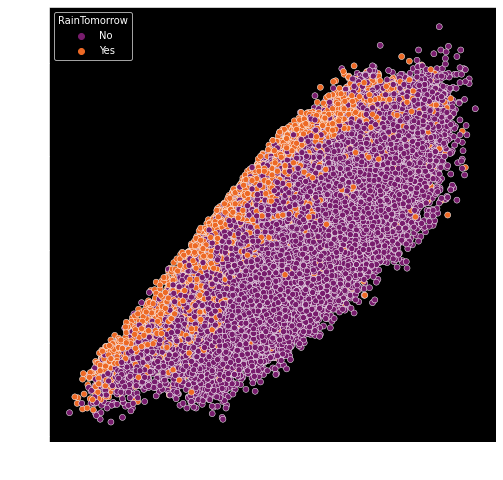

In [14]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

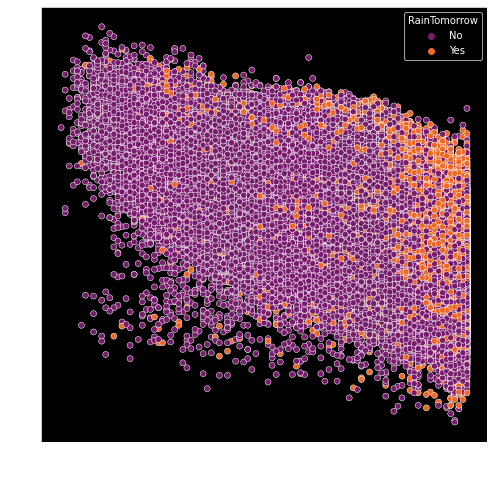

In [15]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

# Heatmap

<AxesSubplot:>

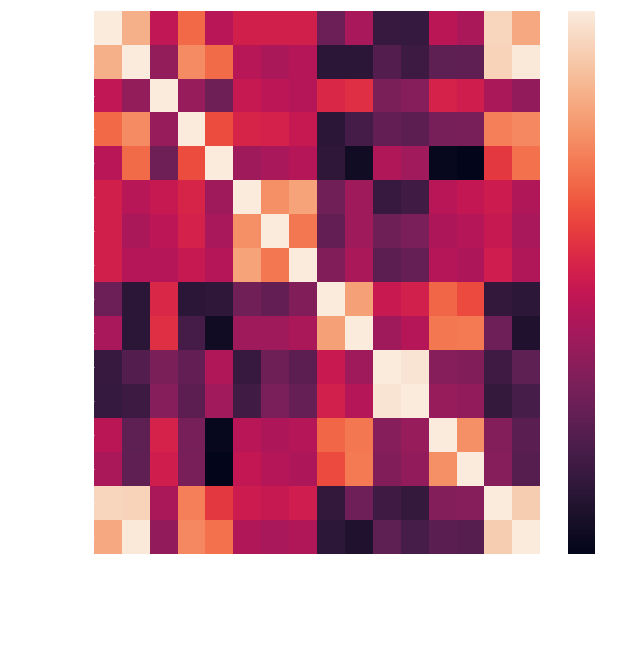

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.8, random_state  = 99, stratify = df['RainTomorrow'])
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)


# Cleaning Categorical Features

In [19]:
# Let's first handle missing values for catergorical data
categorical_col = df_train.select_dtypes('object').columns[:-1].to_list()
df_train[categorical_col].isnull().mean()*100

Location       0.000000
WindGustDir    6.515815
WindDir9am     6.982612
WindDir3pm     2.632874
RainToday      0.988976
dtype: float64

In [20]:
# Imputing with the mode
for col in categorical_col:
    df_train[col].fillna(df_train[col].mode()[0], inplace = True)
    df_test[col].fillna(df_train[col].mode()[0], inplace = True) # Imputing test data using train data

# Handling missing values

In [21]:
# Missing values for numeric data
numeric_col = df.describe().columns.to_list()
df_train[numeric_col].isnull().mean()*100

MinTemp           0.443061
MaxTemp           0.215377
Rainfall          0.988976
Evaporation      42.788825
Sunshine         47.626457
WindGustSpeed     6.474498
WindSpeed9am      0.941505
WindSpeed3pm      1.826749
Humidity9am       1.266769
Humidity3pm       2.530900
Pressure9am       9.853719
Pressure3pm       9.830863
Cloud9am         37.734058
Cloud3pm         40.174411
Temp9am           0.638219
Temp3pm           1.910262
dtype: float64

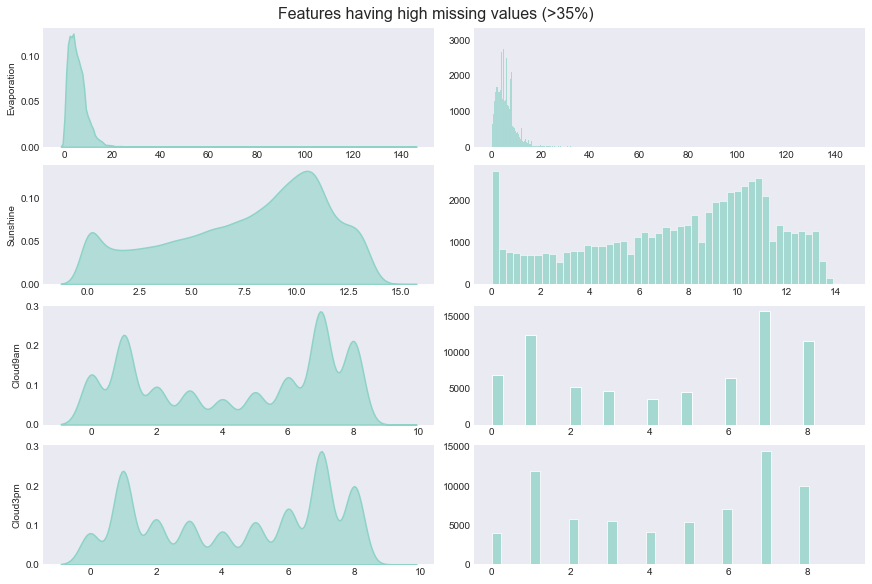

In [22]:
# Let's explore the features having high missing values
cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

plt.style.use('seaborn-dark')
fig, ax = plt.subplots(4,2, figsize = (12, 8), constrained_layout = True)

for i, num_var in enumerate(cols): 
    sns.kdeplot(data = df_train, x = num_var, ax = ax[i][0],
                fill = True, alpha = 0.6, linewidth = 1.5)
    ax[i][0].set_ylabel(num_var)
    ax[i][0].set_xlabel(None)
    
    sns.histplot(data = df_train, x = num_var, ax = ax[i][1])
    ax[i][1].set_ylabel(None)
    ax[i][1].set_xlabel(None)
    
fig.suptitle('Features having high missing values (>35%)', size = 16);

In [23]:
# Droping the columns with high missing values (>35%) and distributed data
# for dataframe in [df_train, df_test]:
#     dataframe.drop(columns = ['Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1, inplace = True)

for dataframe in [df_train, df_test]:
    for cols in ['Sunshine', 'Cloud9am', 'Cloud3pm']:
        dataframe[cols].fillna(df_train[cols].median(), inplace = True)

    dataframe['Evaporation'].fillna(df_train['Evaporation'].mean(), inplace = True)

> Now I will remove the missing values from the remaining numerical features as they are <10%. One can also impute them with mean/ median whichever is appropriate.

In [24]:
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

In [25]:
# Droping the columns
for dataframe in [df_train, df_test]:
    dataframe.drop(['Temp3pm', 'Pressure3pm', 'Temp9am'], axis = 1, inplace = True)

# Removing Outliters

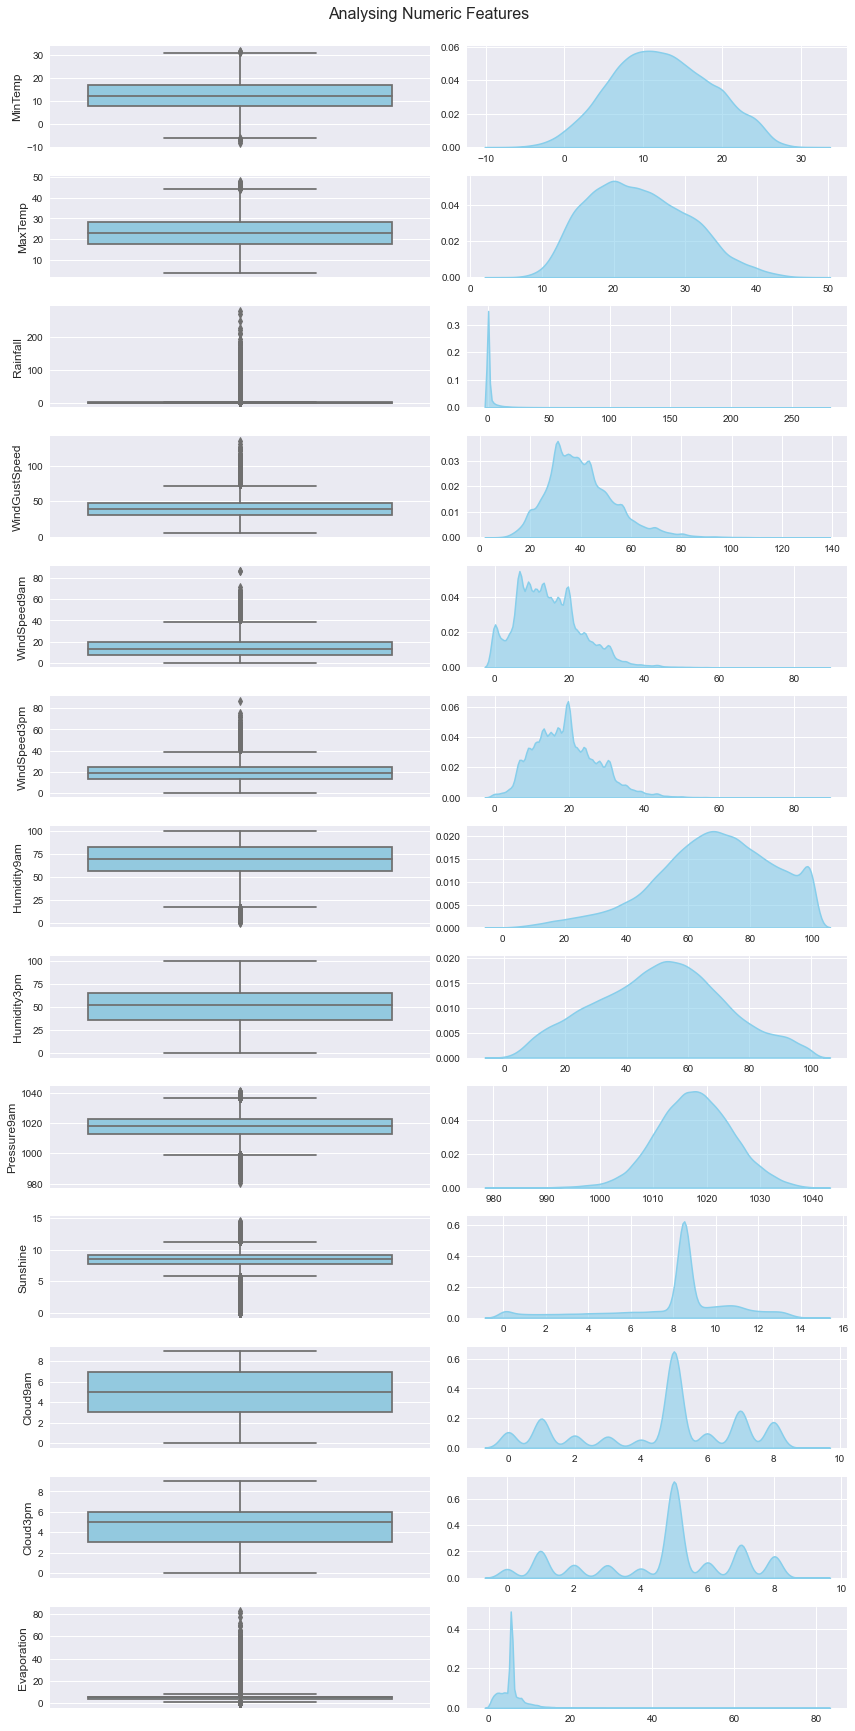

In [26]:
# Let's look at the outliers and the distribution of the numeric features

numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']

plt.style.use('seaborn')
fig, axis = plt.subplots(13, 2, figsize = (12, 24))
for i, num_var in enumerate(numeric_col):
    
    # Checking for the outliers using boxplot
    sns.boxplot(y = num_var, data = df_train, ax = axis[i][0], color = 'skyblue')
    
    # Checking for the distribution using kdeplot
    sns.kdeplot(x = num_var, data = df_train, ax = axis[i][1], color = 'skyblue',
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    axis[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)

fig.suptitle('Analysing Numeric Features', fontsize = 16, y = 1)
plt.tight_layout()

Many numeric features have data points beyond IQR. I am considering a threshold of 5 percentile, for outlier removal, i.e any point beyound 95 percentile and below 5 percentile is considerd as outlier and will be removed.

The threshold of 5 percentile is choosen at random, you can very well consider other values for the threshold also.

In [27]:
threshold = 0.05
for col in numeric_col:
    
    # Donji i gornji prag (threshold)
    lower_threshold = df_train[col].quantile(threshold)
    upper_threshold = df_train[col].quantile(1-threshold)
    
    # Spustanje vrednosti ispod donjeg praga i iznad gornjeg praga
    df_train = df_train[(df_train[col]>=lower_threshold) & (df_train[col]<=upper_threshold)]
    df_test = df_test[(df_test[col]>=lower_threshold) & (df_test[col]<=upper_threshold)]

In [28]:
# Converting 'Yes' and 'No' to '1' and '0' respectively
df_train['RainTomorrow'] = df_train['RainTomorrow'].map(dict({'Yes':1, 'No':0}))
df_test['RainTomorrow'] = df_test['RainTomorrow'].map(dict({'Yes':1, 'No':0}))

In [29]:
# Splitting the data into y and X
y_train = df_train.pop('RainTomorrow')
X_train = df_train

y_test = df_test.pop('RainTomorrow')
X_test = df_test

In [30]:
# Now the data is ready for preprocessing, let's convert categorical variables into one hot encodings
X_train = pd.get_dummies(X_train, drop_first = True).reset_index(drop = True)
X_test = pd.get_dummies(X_test, drop_first = True).reset_index(drop = True)

In [31]:
# Getting the categorical columns
numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
               'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
               'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm']

categorical_col = [i for i in X_train.columns if i not in numeric_col]

In [32]:
# Now the data is ready for preprocessing
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scale = pd.DataFrame(scalar.fit_transform(X_train[numeric_col]), columns = numeric_col) # fit_transform on train
X_test_scale = pd.DataFrame(scalar.transform(X_test[numeric_col]), columns = numeric_col) # only transform on test

In [33]:
# Creating final train and test data
X_train_final = pd.concat([X_train_scale, X_train[categorical_col]], axis = 1)
X_test_final = pd.concat([X_test_scale, X_test[categorical_col]], axis = 1)

# Logistic Regression

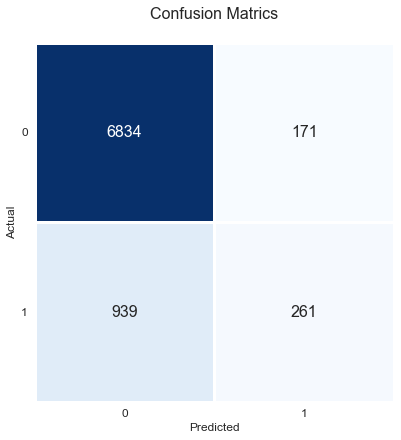

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_final,y_train)
predictions = lr.predict(X_test_final)

matrix = confusion_matrix(y_test, predictions)

plt.style.use('seaborn-dark')
fig, axis1 = plt.subplots(1, 1, figsize=(10, 6), constrained_layout = True)

# Threshold = 0.5

axis1 = sns.heatmap(matrix, annot=True, fmt = '.0f', cbar=False, cmap='Blues',
                    linewidths=3, square=True, ax = axis1, annot_kws={"fontsize":16})
axis1.set_title(f"Confusion Matrics", fontsize=16, y=1.05);
axis1.set_xlabel('Predicted', fontsize=12)
axis1.set_ylabel('Actual', fontsize=12)
axis1.set_xticklabels([0,1], fontsize=12 )
axis1.set_yticklabels([0,1], fontsize=12, rotation=0);


In [35]:
print(classification_report(y_test, predictions))
print('Accuracy Score: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      7005
           1       0.60      0.22      0.32      1200

    accuracy                           0.86      8205
   macro avg       0.74      0.60      0.62      8205
weighted avg       0.84      0.86      0.84      8205

Accuracy Score:  0.8647166361974405


# XGBoost Classifier

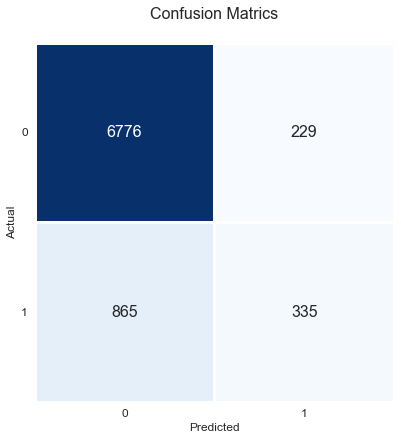

In [36]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train_final, y_train)
pred = xgb.predict(X_test_final)
matrix = confusion_matrix(y_test, pred)

plt.style.use('seaborn-dark')
fig, axis1 = plt.subplots(1, 1, figsize=(10, 6), constrained_layout = True)

# Threshold = 0.5

axis1 = sns.heatmap(matrix, annot=True, fmt = '.0f', cbar=False, cmap='Blues',
                    linewidths=3, square=True, ax = axis1, annot_kws={"fontsize":16})
axis1.set_title(f"Confusion Matrics", fontsize=16, y=1.05);
axis1.set_xlabel('Predicted', fontsize=12)
axis1.set_ylabel('Actual', fontsize=12)
axis1.set_xticklabels([0,1], fontsize=12 )
axis1.set_yticklabels([0,1], fontsize=12, rotation=0);


In [37]:
print(classification_report(y_test,pred))
print('Accuracy score: ',accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7005
           1       0.59      0.28      0.38      1200

    accuracy                           0.87      8205
   macro avg       0.74      0.62      0.65      8205
weighted avg       0.84      0.87      0.85      8205

Accuracy score:  0.8666666666666667


# ANN

In [38]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

In [39]:
# Creating the ANN
model = Sequential()

# layers
model.add(Dense(units = 1024, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train_final.shape[1]))
model.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', keras.metrics.AUC()])

In [40]:
# For live plotting
from IPython.display import clear_output
class live_accuracy(keras.callbacks.Callback):
    plt.style.use('ggplot')
    
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.accuracy = []
        self.val_accuracy = []
        self.auc = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        plt.xlim([0, epochs-1])
        plt.ylim([0.5, 1.0])
        plt.title('Training and Validation Accuracy', size = 16)
        plt.xlabel('epochs')
        plt.ylabel('accuracy')
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        self.auc.append(logs.get('auc'))
        
        self.i += 1
        
        clear_output(wait=True)
        
        plt.plot(self.x, self.accuracy, label="train_accuracy")
        plt.plot(self.x, self.val_accuracy, label="val_accuracy")
        
#         plt.text(x = epochs-2, y = 0.7,
#                 s = f"AUC : {round(self.auc[-1],2)}",
#                 ha = 'center', size = 14, rotation = 0, color = 'black',
#                 bbox=dict(boxstyle="round,pad=1", fc='none', ec="black", lw=2))
           
        plt.legend()
        plt.show();
        
plot_accuracy = live_accuracy()

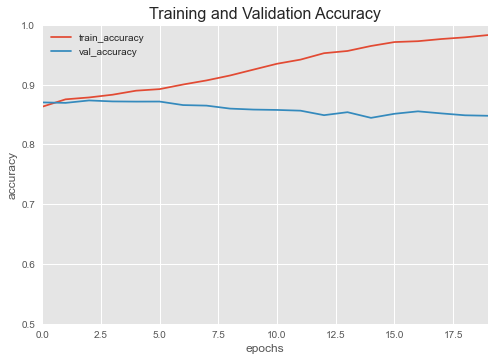

717/717 [==============================] - 9s 13ms/step - loss: 0.0469 - accuracy: 0.9829 - auc: 0.9961 - val_loss: 1.1814 - val_accuracy: 0.8479 - val_auc: 0.7372


In [41]:
# Train the ANN
epochs = 20
batch_size = 32

history = model.fit(X_train_final, y_train, batch_size = batch_size,
                    epochs = epochs, callbacks=[plot_accuracy], validation_split = 0.3)

<b>Model Evaluation</b>

257/257 [==============================] - 1s 3ms/step


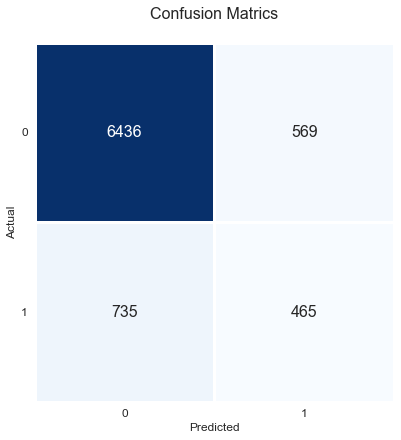

In [42]:
# Model Evaluation
from sklearn.metrics import confusion_matrix
y_pred = (model.predict(X_test_final) > 0.5).astype("int32")
matrix = confusion_matrix(y_test, y_pred)
plt.style.use('seaborn-dark')
fig, axis1 = plt.subplots(1, 1, figsize=(10, 6), constrained_layout = True)

# Threshold = 0.5

axis1 = sns.heatmap(matrix, annot=True, fmt = '.0f', cbar=False, cmap='Blues',
                    linewidths=3, square=True, ax = axis1, annot_kws={"fontsize":16})
axis1.set_title(f"Confusion Matrics", fontsize=16, y=1.05);
axis1.set_xlabel('Predicted', fontsize=12)
axis1.set_ylabel('Actual', fontsize=12)
axis1.set_xticklabels([0,1], fontsize=12 )
axis1.set_yticklabels([0,1], fontsize=12, rotation=0);

In [43]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('Accuracy score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7005
           1       0.45      0.39      0.42      1200

    accuracy                           0.84      8205
   macro avg       0.67      0.65      0.66      8205
weighted avg       0.83      0.84      0.84      8205

Accuracy score:  0.8410725167580744
